### 1. Define Project

In this dynamic project, I harnessed the power of machine learning to revolutionize the way we understand and predict salaries based on LinkedIn job titles. Leveraging advanced algorithms, I developed a robust model capable of analyzing various factors that influence salary outcomes, providing valuable insights for both job seekers and employers.

Key Features:

Data-driven Insights: I curated a comprehensive dataset from LinkedIn, incorporating diverse job titles and corresponding salary information. This data served as the foundation for training the machine learning model.

Predictive Modeling: Through the implementation of cutting-edge machine learning techniques, I created a predictive model capable of forecasting salary ranges for specific job titles. This enables users to make informed decisions regarding salary expectations.

User-Friendly Interface: The project includes an intuitive interface that allows users to input a job title and receive an accurate salary prediction. This user-friendly design enhances accessibility and encourages widespread utilization.

Continuous Learning: To ensure the model's accuracy and relevance, I implemented a feedback loop for continuous learning. This enables the model to adapt to changing job market dynamics and evolving salary trends.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

### 2. Data Exploration


Import the dataset

In [113]:
df = pd.read_csv('Fixed_Linkedin.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Job_Title       2720 non-null   object
 1   Company_Name    3100 non-null   object
 2   Salary          3100 non-null   int64 
 3   Working_Status  3100 non-null   object
 4   Working_Type    3100 non-null   object
 5   Skills          3100 non-null   object
 6   Employee        3031 non-null   object
 7   Industry        2800 non-null   object
 8   Location        3100 non-null   object
 9   Date            3100 non-null   object
dtypes: int64(1), object(9)
memory usage: 242.3+ KB


In [114]:
df

,Job_Title,Company_Name,Salary,Working_Status,Working_Type,Skills,Employee,Industry,Location,Date
0,Data Engineer,Arine,150000,Full-time,Remote,"['Python(ProgrammingLanguage)', 'AmazonWebServ...",51-200 employees,Hospitals and Health Care,United States,4 days ago
1,Software Engineer,TKG,252719,Full-time,On-site,"['Back-EndWebDevelopment', 'Full-StackDevelopm...",11-50 employees,NaN,"North Canton, OH",4 days ago
2,Software Engineer,"Eccalon, LLC",259978,Full-time,Hybrid,"['AmazonWebServices(AWS)', 'Bootstrap(Framewor...",51-200 employees,Defense and Space Manufacturing,"Hanover, MD",4 days ago
3,Software Engineer,Versaterm Public Safety,231423,Full-time,Hybrid,"['AccessibilityPolicies', 'Angular', 'C#', 'Ca...",201-500 employees,Software Development,"Columbia, South Carolina Metropolitan Area",1 week ago
4,Software Engineer intern,Adobe,105486,Full-time,On-site,"['Java', 'ProblemSolving', 'Python(Programming...","10,001+ employees",Software Development,"San Francisco, CA Reposted 2 hours ago",2 hours ago
...,...,...,...,...,...,...,...,...,...,...
3095,Data Engineer,Compunnel Inc.,206954,Full-time,On-site,"['Python(ProgrammingLanguage)', 'Alteryx', 'Am...","1,001-5,000 employees",IT Services and IT Consulting,"Smithfield, RI",1 week ago
3096,Data Engineer,Compunnel Inc.,268829,Full-time,On-site,"['Python(ProgrammingLanguage)', 'Alteryx', 'Am...","1,001-5,000 employees",IT Services and IT Consulting,"Smithfield, RI",1 week ago
3097,Data Engineer,Compunnel Inc.,173197,Full-time,On-site,"['Python(ProgrammingLanguage)', 'Alteryx', 'Am...","1,001-5,000 employees",IT Services and IT Consulting,"Smithfield, RI",1 week ago
3098,Data Engineer,Compunnel Inc.,10279,Full-time,On-site,"['Python(ProgrammingLanguage)', 'Alteryx', 'Am...","1,001-5,000 employees",IT Services and IT Consulting,"Smithfield, RI",1 week ago


Checking unique value for confirming data quality

In [115]:
def data_type_check(df):
    data_check = pd.DataFrame({'Unique values':"", 'Dtype':df.dtypes})
    for index in data_check.index:
        data_check.loc[index,'Unique values']=df[index].unique()
    return data_check

In [116]:
data_type_check(df)

,Unique values,Dtype
Job_Title,"[Data Engineer, Software Engineer, Software En...",object
Company_Name,"[Arine , TKG , Eccalon, LLC , Versaterm Public...",object
Salary,"[150000, 252719, 259978, 231423, 105486, 3306,...",int64
Working_Status,Full-time,object
Working_Type,"[Remote, On-site, Hybrid]",object
Skills,"[['Python(ProgrammingLanguage)', 'AmazonWebSer...",object
Employee,"[51-200 employees , 11-50 employees, 201-500 e...",object
Industry,"[ Hospitals and Health Care, nan, Defense and...",object
Location,"[ United States, North Canton, OH, Hanover, ...",object
Date,"[4 days ago, 1 week ago, 2 hours ago, 5 days a...",object


Review numeric columns in the dataset

In [117]:
df.describe()

,Salary
count,3100.000000
mean,148540.063548
std,98594.367493
min,40.000000
25%,73892.250000
50%,128692.000000
75%,209224.750000
max,400000.000000


Checking missing values duplicated values

In [118]:
error_values = pd.DataFrame({'No unique values': df.nunique(),
                         'Missing Value': df.isna().sum(),
                         'Duplicated': df.duplicated().sum(),
                         'Dtype': df.dtypes})
error_values

,No unique values,Missing Value,Duplicated,Dtype
Job_Title,9,380,286,object
Company_Name,1108,0,286,object
Salary,2479,0,286,int64
Working_Status,1,0,286,object
Working_Type,3,0,286,object
Skills,1542,0,286,object
Employee,16,69,286,object
Industry,118,300,286,object
Location,693,0,286,object
Date,56,0,286,object


Analysis:

-The dataset appears to have information related to job postings or employment opportunities.

-"Salary" column has a significant number of unique values, indicating diversity in salary information.

-Columns like "Job_Title," "Company_Name," "Skills," "Industry," and "Location" have a considerable number of unique values, suggesting diversity in job titles, companies, required skills, industries, and job locations.

-"Employee" column has 16 unique values, possibly indicating different employee types or categories.

-Some columns have missing values, such as "Job_Title," "Employee," and "Industry." The handling of missing data may be necessary depending on the analysis goals.

Removing unused columns and splitting the location values into city and state

In [119]:
for i in range(0,len(df['Job_Title'])-1):
    if (df.loc[i,'Job_Title'] == df.loc[i+1,'Job_Title'] and df.loc[i,'Company_Name'] == df.loc[i+1,'Company_Name'] 
        and df.loc[i,'Date'] == df.loc[i+1,'Date']):
        df.drop(i,axis = 'index',inplace=True)
df['Location'] = df['Location'].apply(lambda x: x.split(',')[0])

df.drop('Industry', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

Dropping the Job_Title that are not my target.

In [120]:
for i in range(0,len(df['Job_Title'])):
    if ('engineer' not in str(df.loc[i, 'Job_Title']).lower() and 'developer' not in str(df.loc[i, 'Job_Title']).lower() 
        and 'data' not in str(df.loc[i, 'Job_Title']).lower()):
        df.drop(i,axis = 'index',inplace=True)
df = df.reset_index()
df.drop('index',inplace=True,axis=1) 

Chaging skills into columns for easy evaluation and marking them based on jobs'requirements

In [121]:
skill_lis = []
skill_unique = []
for i in range(len(df['Skills'])):
    df.loc[i,'Skills'] = df.loc[i,'Skills'].replace('\'', ' ').replace('[','').replace(']','').replace(' ','')
    for skill in df.loc[i,'Skills'].split(','):
        skill_lis.append(skill)
        if skill not in skill_unique:
            skill_unique.append(skill)
skill_lis.count('AmazonWebServices(AWS)')
sum = 0
skill_collection = []
for ele in skill_unique:
    if skill_lis.count(ele) > 30:
        skill_collection.append(ele)
skill_collection.count('Python')

0

In [122]:
for i in range(len(df['Skills'])):
    for ele in skill_collection:
        if ele in df.loc[i,'Skills']:
            df.loc[i,ele] = 1
        else:
            df.loc[i,ele] = 0

C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\1543133781.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[i,ele] = 0


In [123]:
df.drop('Skills', axis=1, inplace=True)

Setting date based on the date I get from linkedin

In [124]:
get_data_date = datetime.date(2023,10,20)

index = 0;
for ele in df['Date']:
    ele = ele.split(' ')
    num = int(ele[0])
    if ele[1] == 'week':
        num *= 7
    elif ele[1] == 'month':
        num *= 30
    elif ele[1] == 'year':
        num *= 365
    timedelta = datetime.timedelta(days = num)
    df.loc[index,'Date'] = str(get_data_date - timedelta)
    index = index + 1

In [125]:
for col in df.columns:
    if 'Unnamed' in col:
        df.drop(columns = col,axis=1,inplace = True)
df = df.dropna(how = 'any')
df = df.drop(columns=['DataAnalytics', 'DataAnalysis', 'Analytics','Visualization'],axis=1)
df.to_csv("Streamlit_Linkedin_Jobs.csv",index = False)

Identify and extract locations and job titles that occur more than 10 times in the dataset.

In [126]:
fil_Location = df['Location'].value_counts().reset_index()
get_location = fil_Location[fil_Location['count'] >= 10]['Location']

job_title_df = df['Job_Title'].value_counts().reset_index()
get_title = job_title_df[job_title_df['count'] >= 10]['Job_Title']



Illustrating the relationships among location, job title, working type, number of employees, and salary.

C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\2919061675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.boxplot(data = location_df, x='Location',y = 'Salary',palette='Set1')
C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\2919061675.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(),rotation=70)


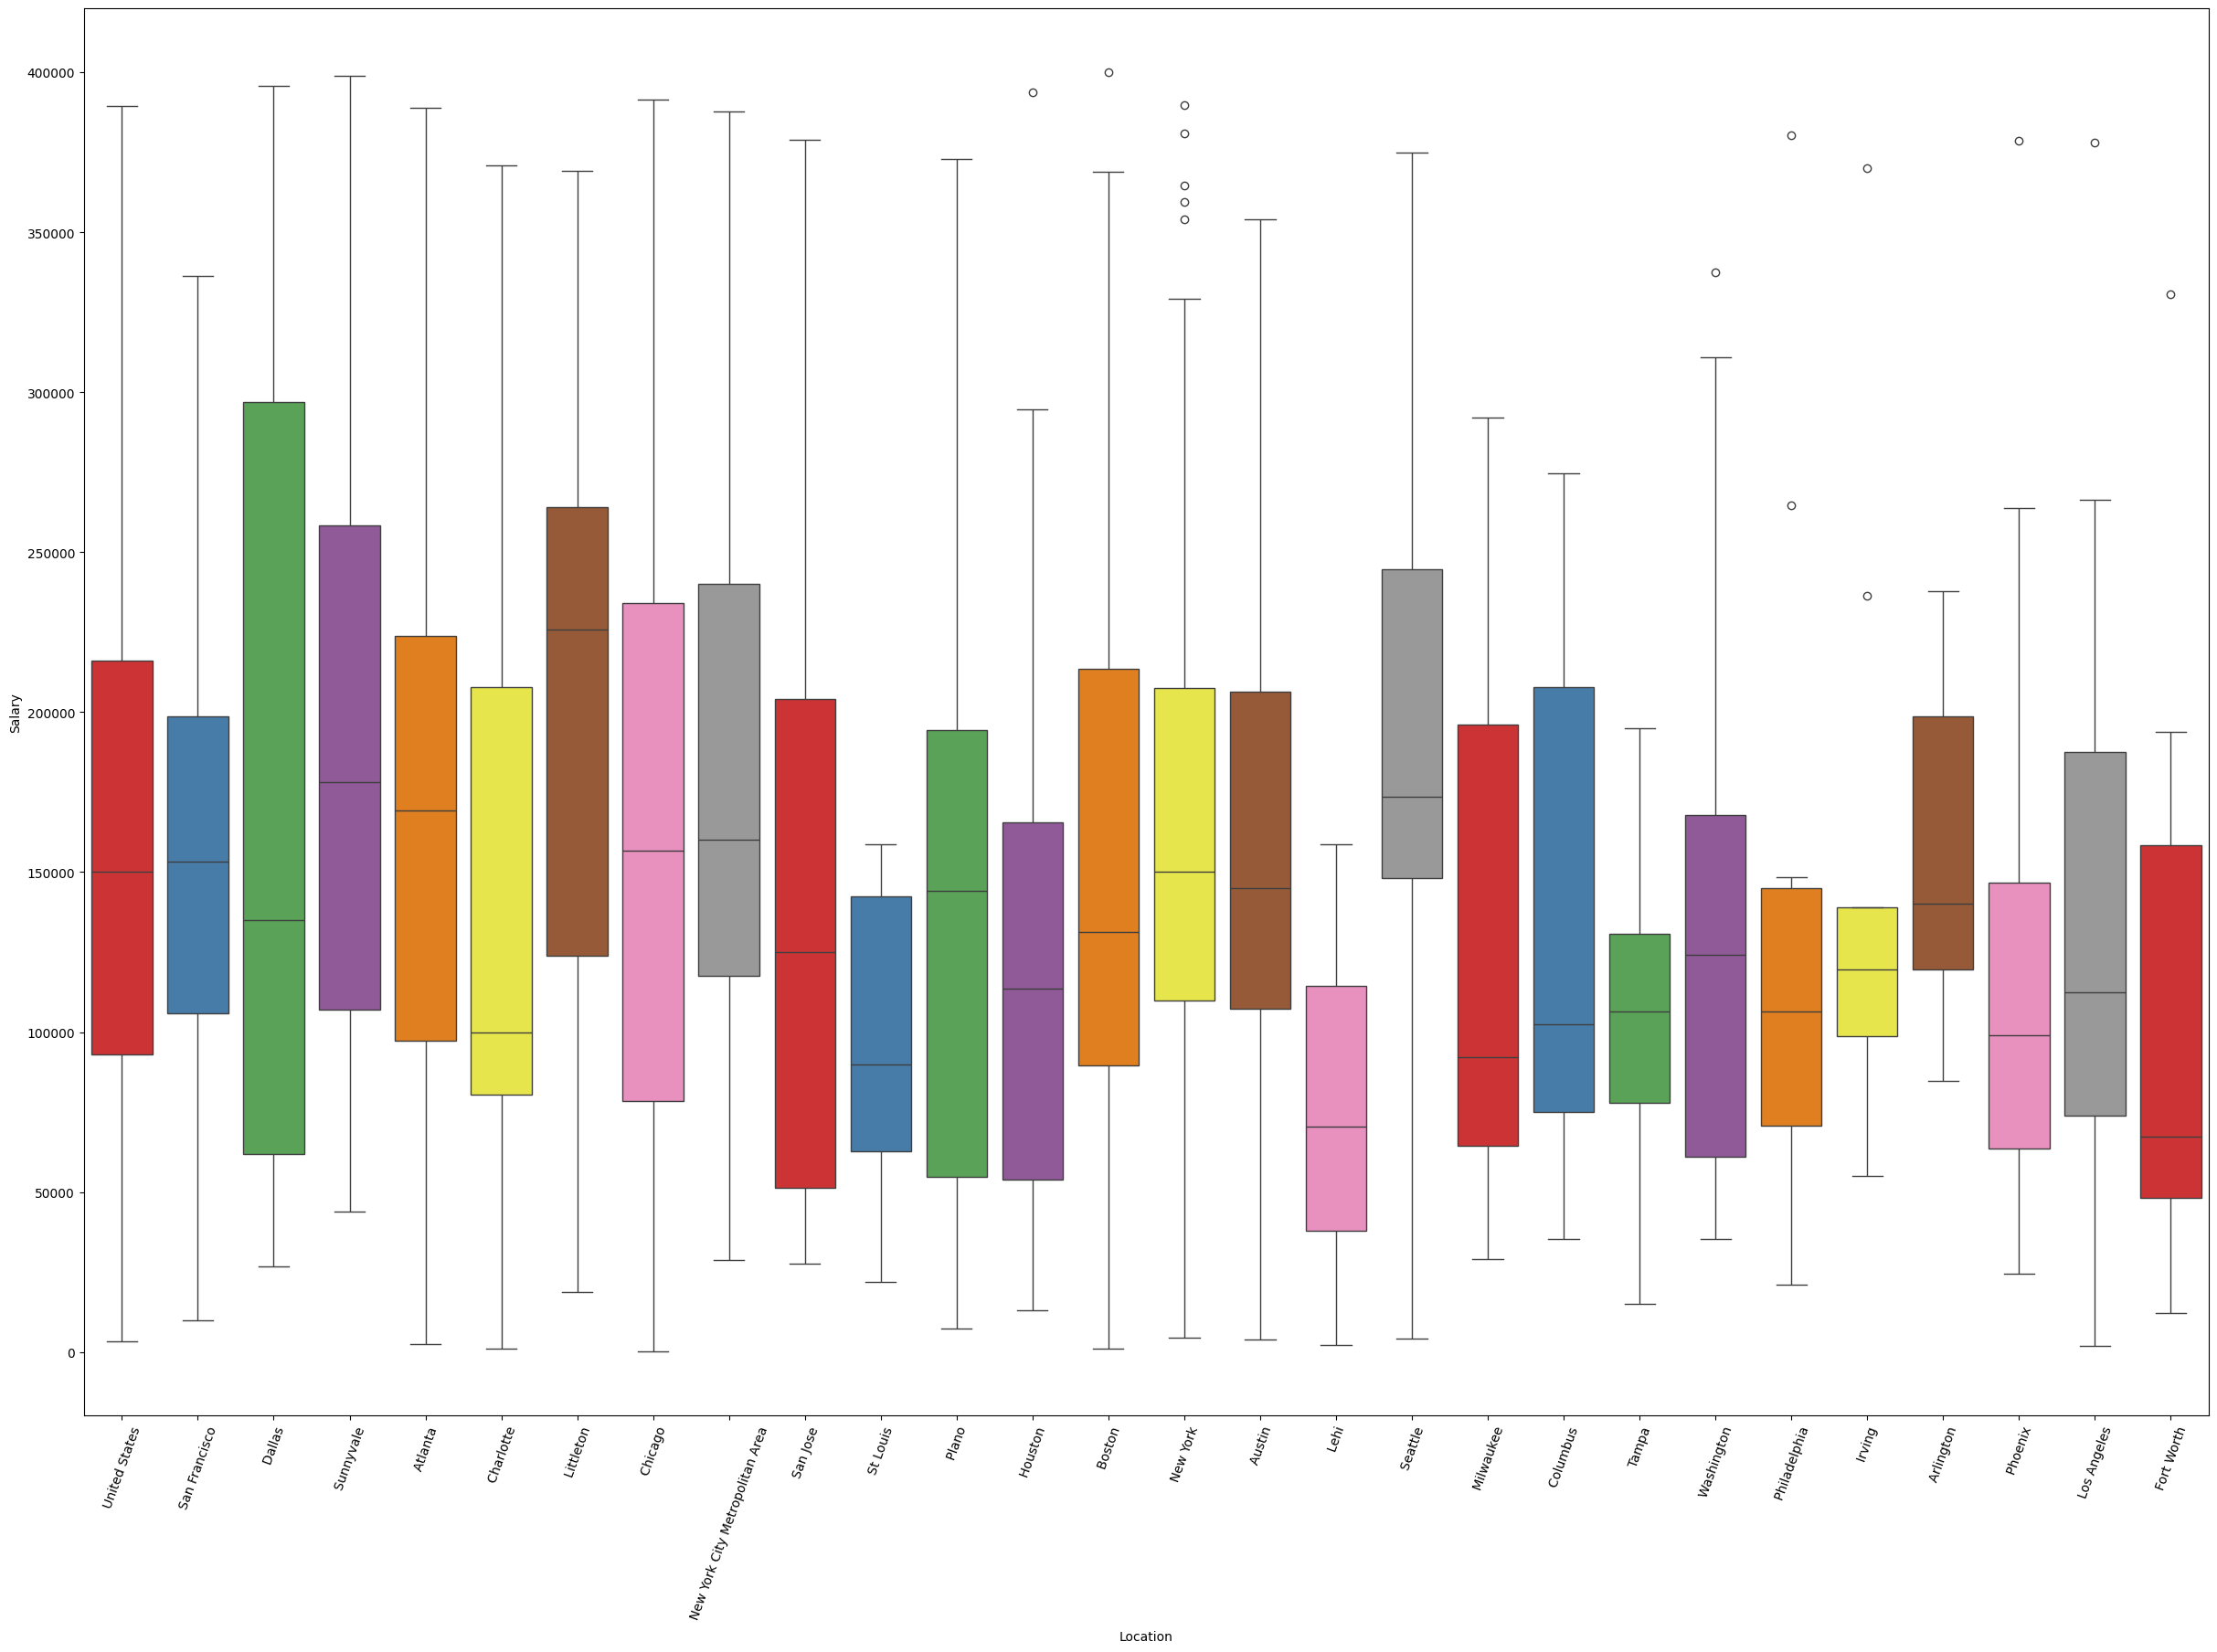

In [127]:
location_df = df[df['Location'].isin(get_location)][['Location','Salary']]
plt.figure(figsize=(30,20))
graph = sns.boxplot(data = location_df, x='Location',y = 'Salary',palette='Set1')
graph.set_xticklabels(graph.get_xticklabels(),rotation=70)
plt.show()

C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\27776436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box1 = sns.boxplot(data=df, x=df[df[colname].isin(serie)][colname],y = df[df[colname].isin(serie)]['Salary']
C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\27776436.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box1.set_xticklabels(box1.get_xticklabels(),rotation=70)
C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\27776436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box1 = sns.boxplot(data=df, x=df[df[colname].isin(serie)][colname],y = df[df[colname].isin(serie)]['Salary']
C:\Users\tranm\AppData\Local\T

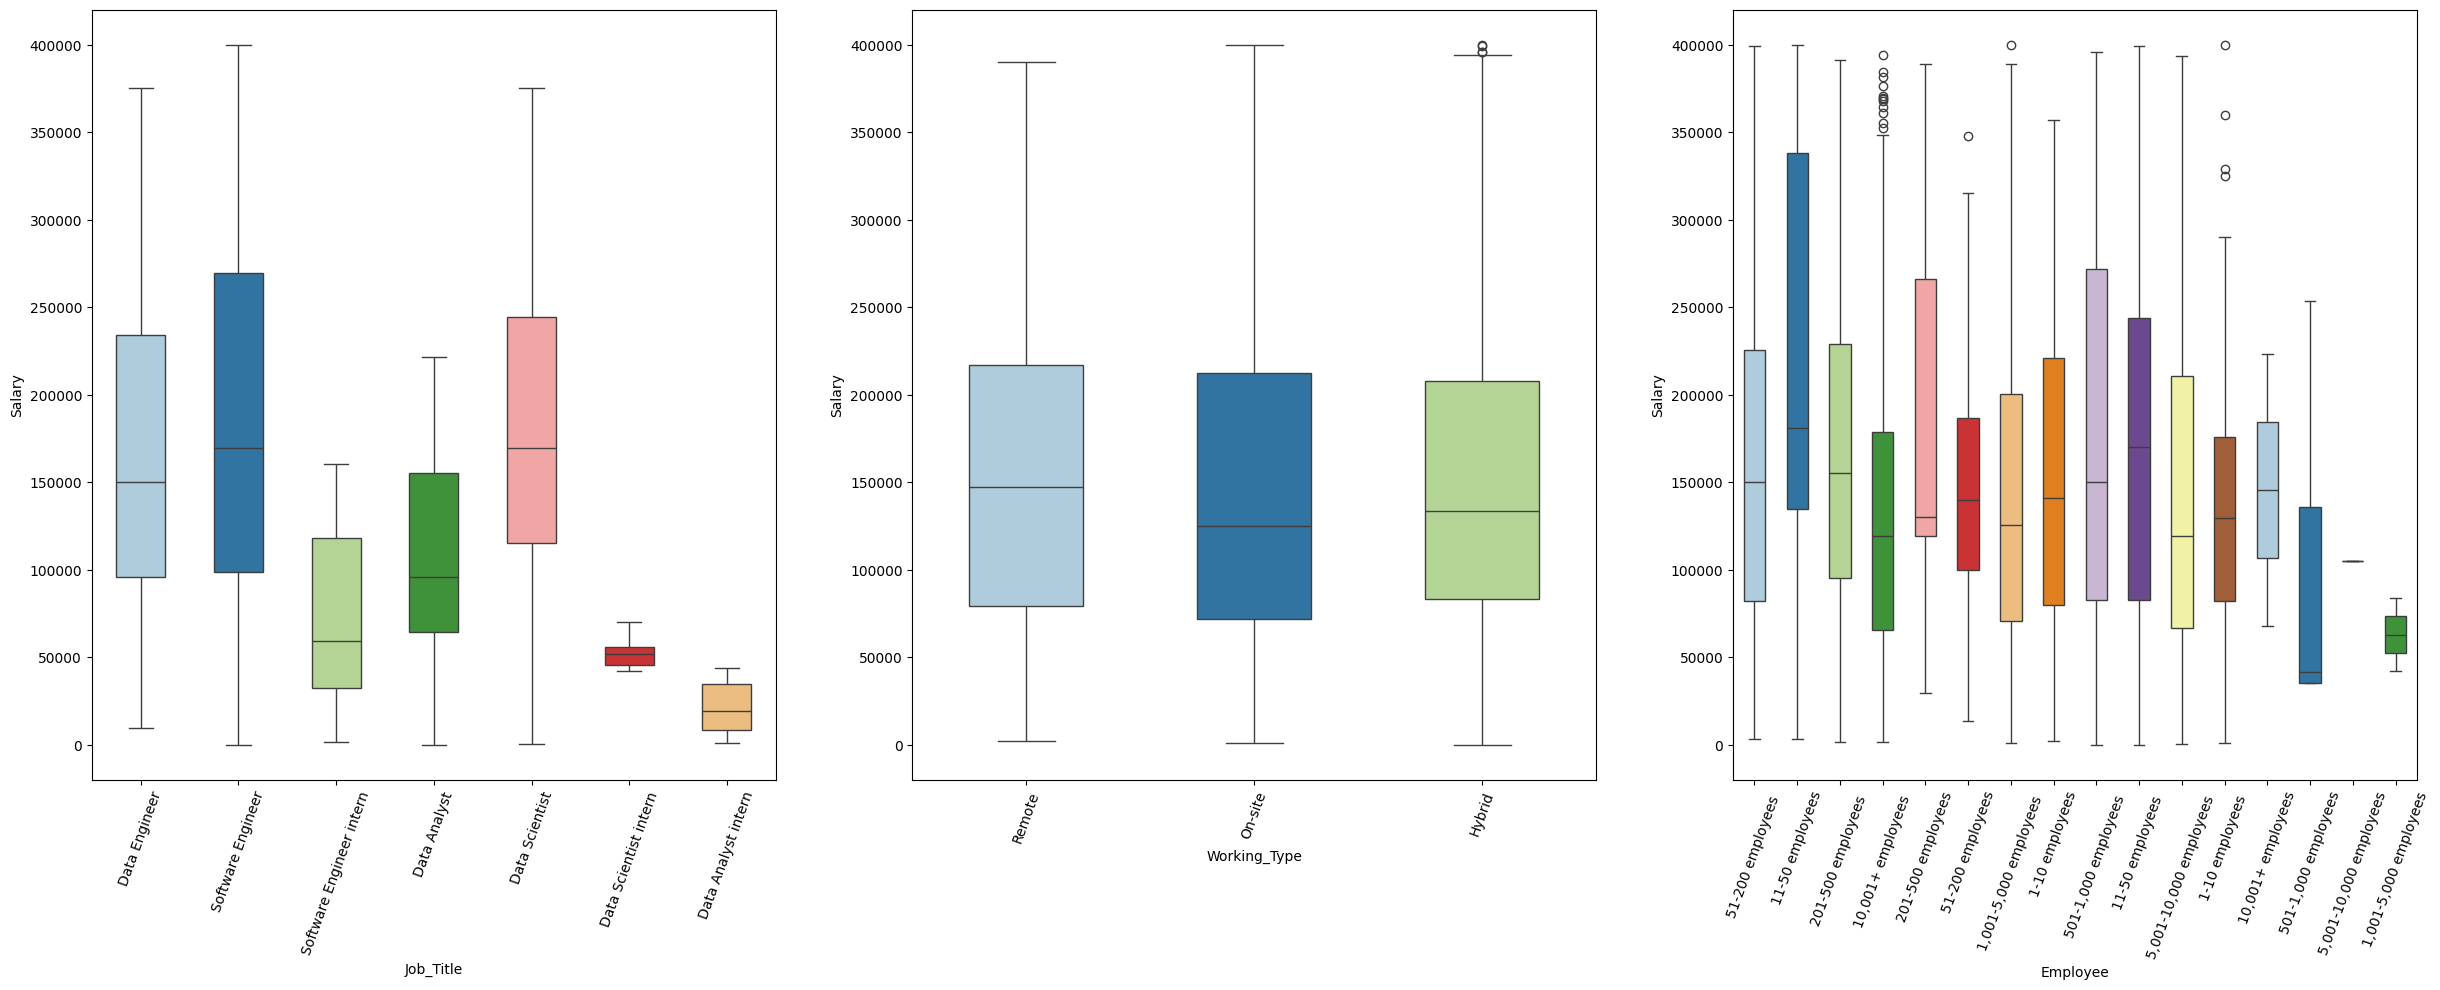

In [128]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize=(30,10))
chosen_series = [get_title,df['Working_Type'],df['Employee']]
cols = ['Job_Title','Working_Type','Employee']
for colname,serie, pos in zip(cols,chosen_series,ax.flatten()):
    box1 = sns.boxplot(data=df, x=df[df[colname].isin(serie)][colname],y = df[df[colname].isin(serie)]['Salary']
                       ,width = 0.5,ax=pos,palette="Paired")
    box1.set_xticklabels(box1.get_xticklabels(),rotation=70)

Analysis for relation between salary and job title, location, working type, working status

-The salary range and average salaries vary for each role, with Software Engineers generally having a higher average salary compared to Data Scientists and Data Engineers.

-Remote work options are prevalent across all roles, indicating a growing trend in the tech industry toward flexible work arrangements.

-The location of job opportunities spans major tech hubs such as San Francisco, New York, and Seattle, as well as other cities.

-Company size doesn't seem to be a limiting factor, as positions are available in startups as well as large enterprises.

Illustrating the relationships among location, job title, working type, number of employees, and mean salary.

C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\344699096.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(data = location_df, x = 'Location', y = 'Mean_Salary', palette = 'Set3')
C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\344699096.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(),rotation=70)


[]

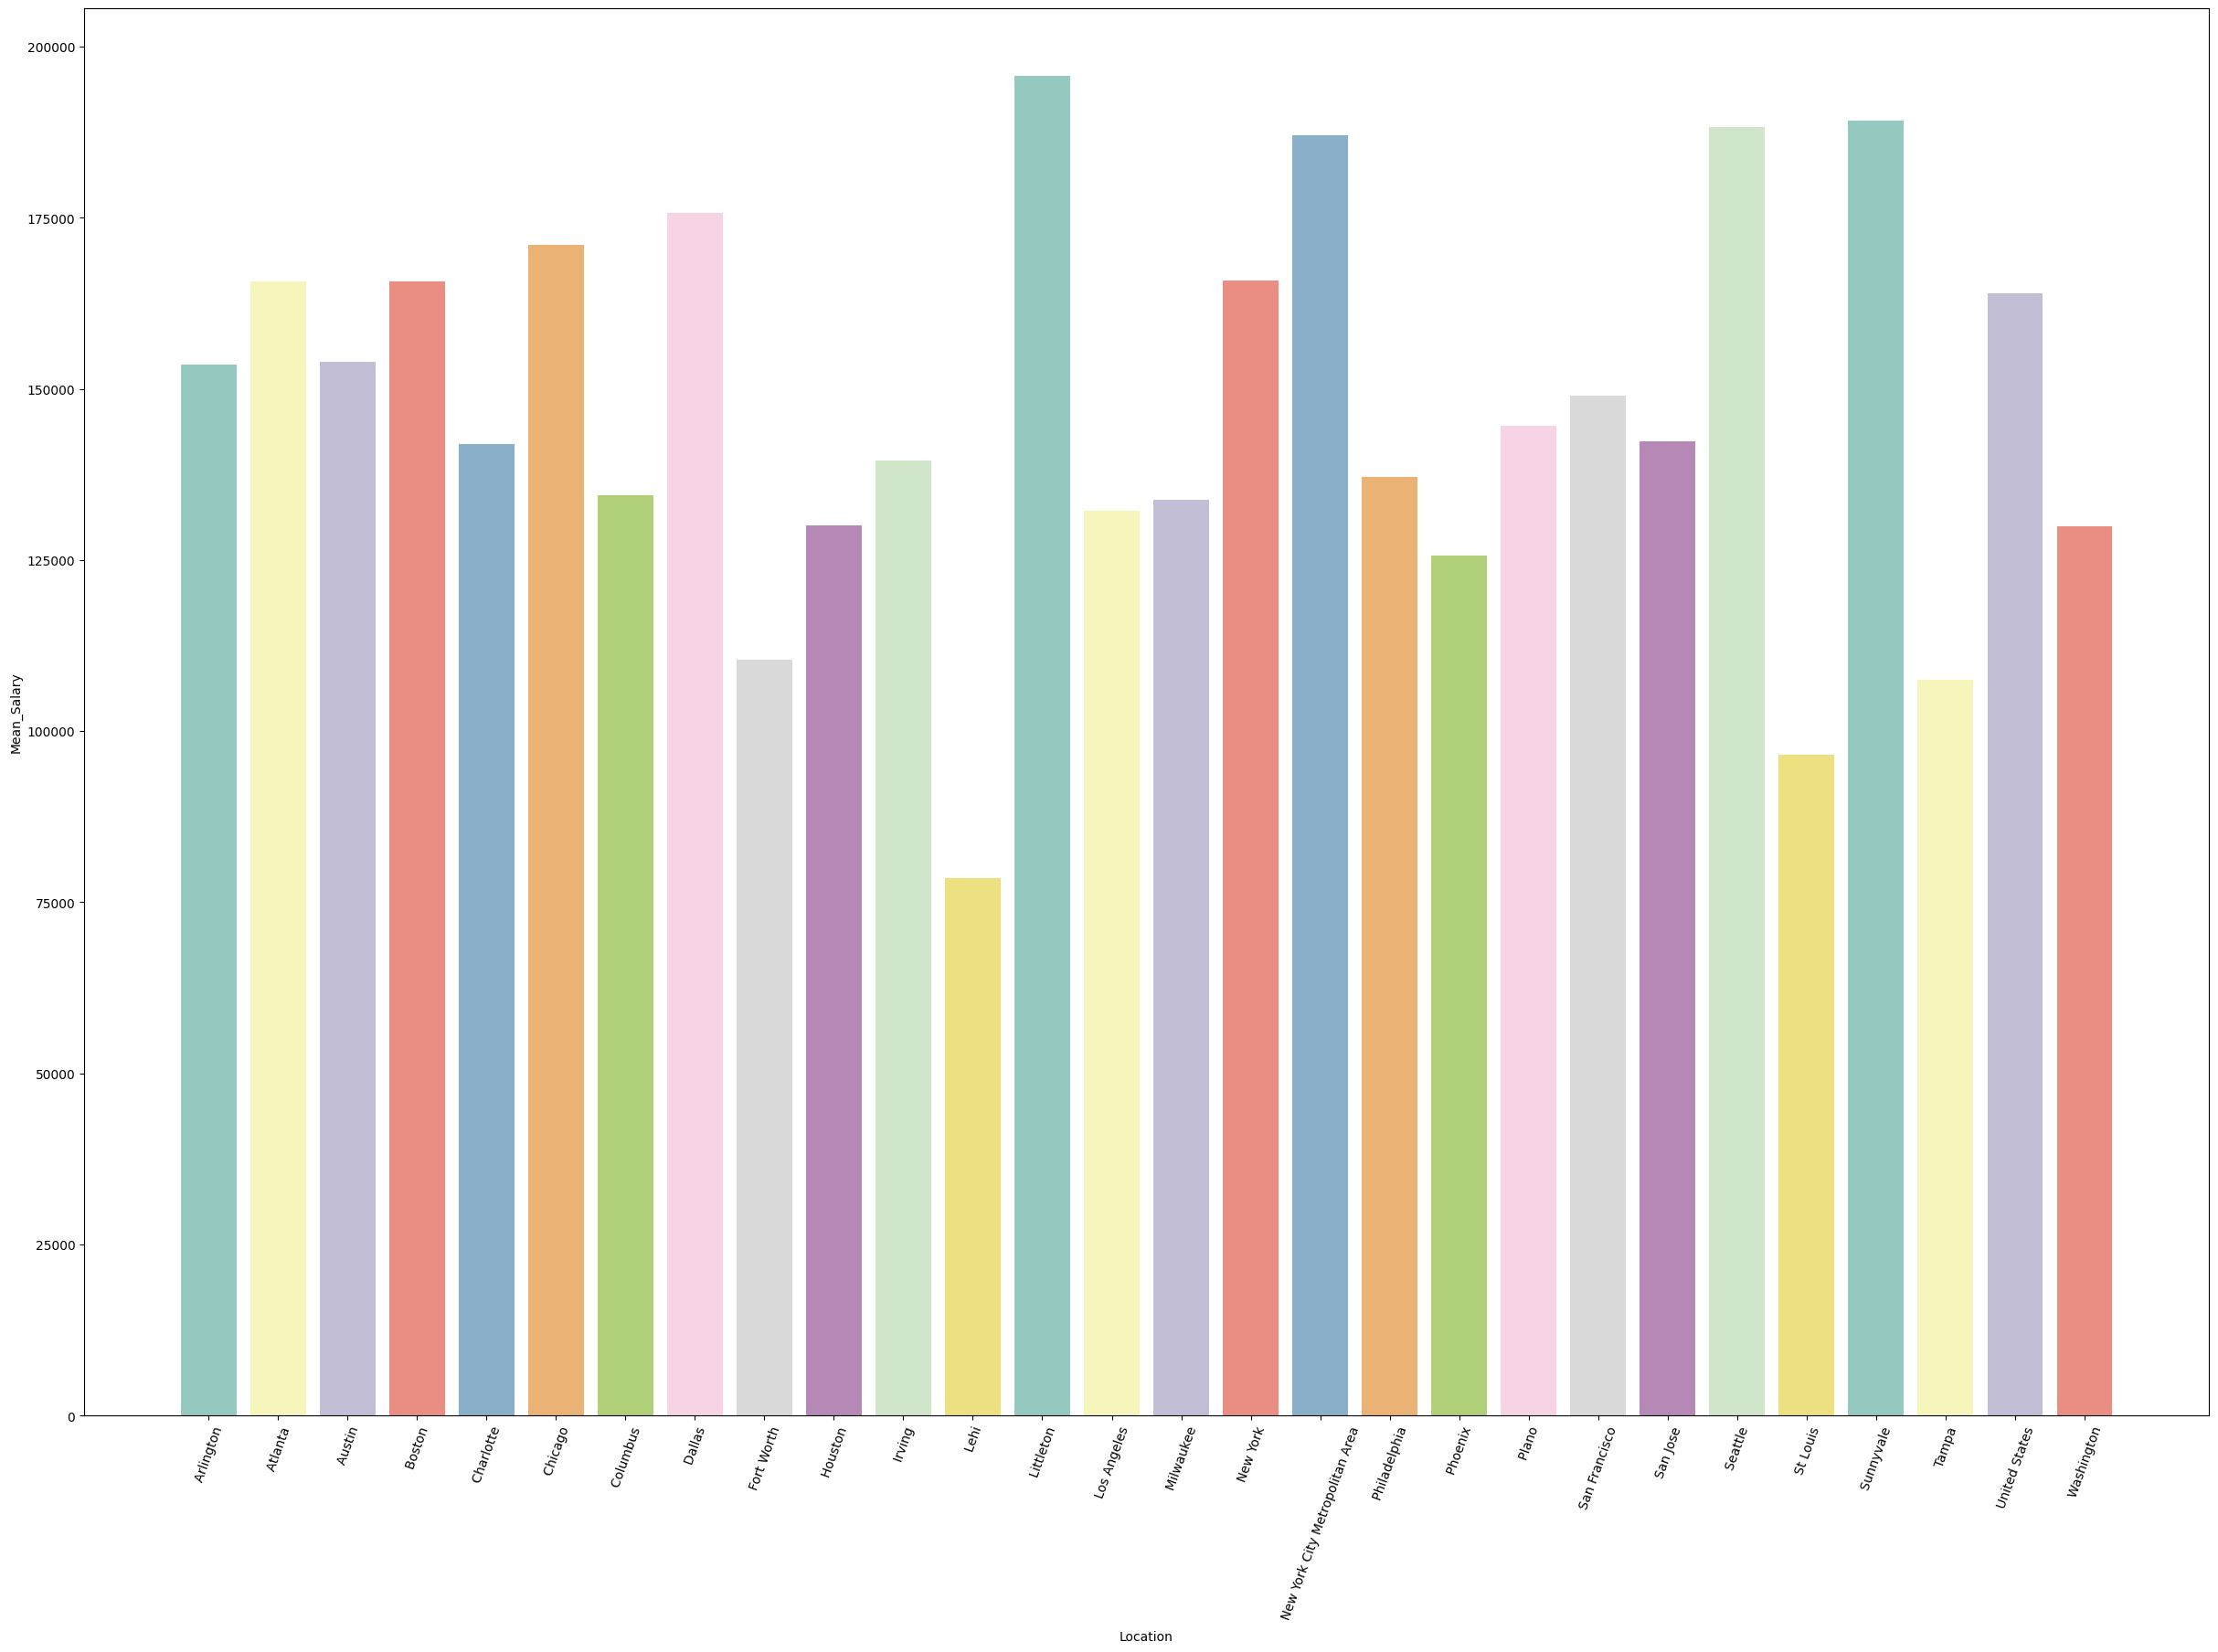

In [129]:
location_df = df.groupby('Location').agg({'Salary':'mean'}).reset_index()
location_df = location_df[location_df['Location'].isin(get_location)]
location_df = location_df.rename(columns = {'Salary':'Mean_Salary'})
plt.figure(figsize = (30,20))
graph = sns.barplot(data = location_df, x = 'Location', y = 'Mean_Salary', palette = 'Set3')
graph.set_xticklabels(graph.get_xticklabels(),rotation=70)
plt.plot()

C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\3099532167.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box1 = sns.barplot(data = mean_df,x = colname,y='Mean_Salary',ax = pos,palette = 'Set2')
C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\3099532167.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box1.set_xticklabels(box1.get_xticklabels(),rotation=70)
C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\3099532167.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box1 = sns.barplot(data = mean_df,x = colname,y='Mean_Salary',ax = pos,palette = 'Set2')
C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\3099532167.

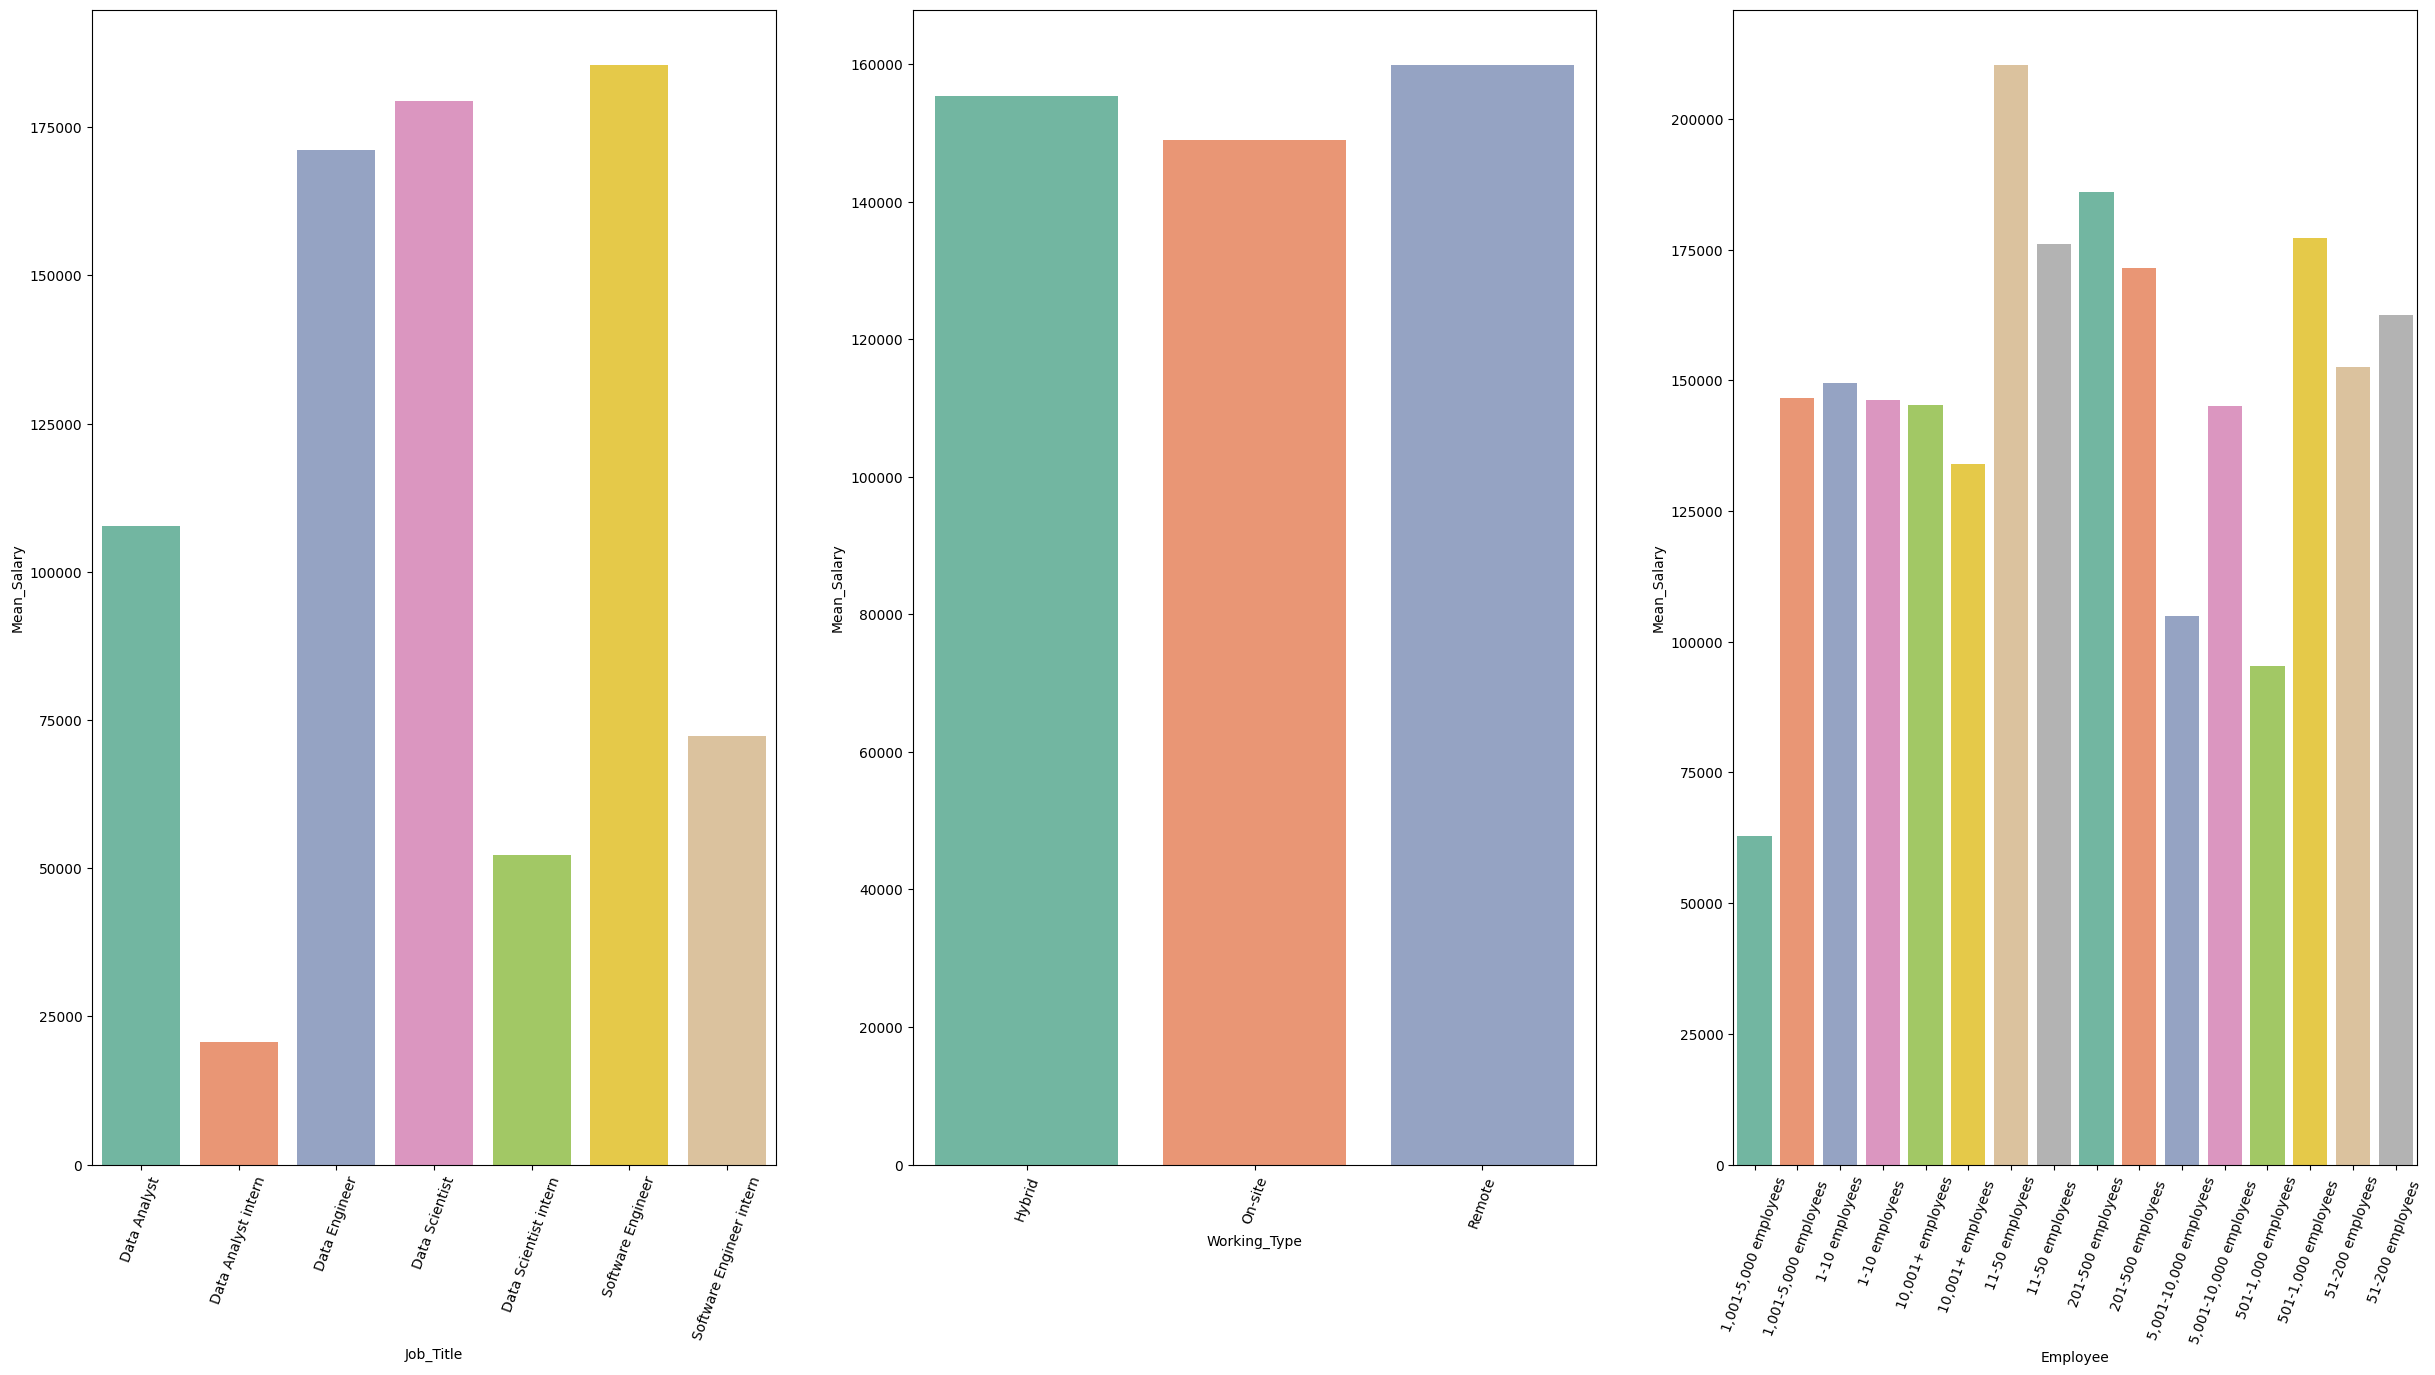

In [130]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize=(30,15))
cols = ['Job_Title','Working_Type','Employee']
fil_ter = [get_title,df['Working_Type'],df['Employee']]
salary_mean_df = []
for col,filt in zip(cols,fil_ter):
    check = df.groupby(col).agg({'Salary':'mean'}).reset_index()
    check = check.rename(columns = {'Salary':'Mean_Salary'})
    salary_mean_df.append(check[check[col].isin(filt)])

for colname,mean_df, pos in zip(cols,salary_mean_df,ax.flatten()):
    
    box1 = sns.barplot(data = mean_df,x = colname,y='Mean_Salary',ax = pos,palette = 'Set2')
    box1.set_xticklabels(box1.get_xticklabels(),rotation=70)

Displaying the frequency of companies requiring a specific skill.

C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\3164847713.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  skills_graph = sns.barplot(data=new_skills_df,x='Skills',y='Number_of_Companies',palette='Set2')
C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\3164847713.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  skills_graph.set_xticklabels(skills_graph.get_xticklabels(),rotation=70)


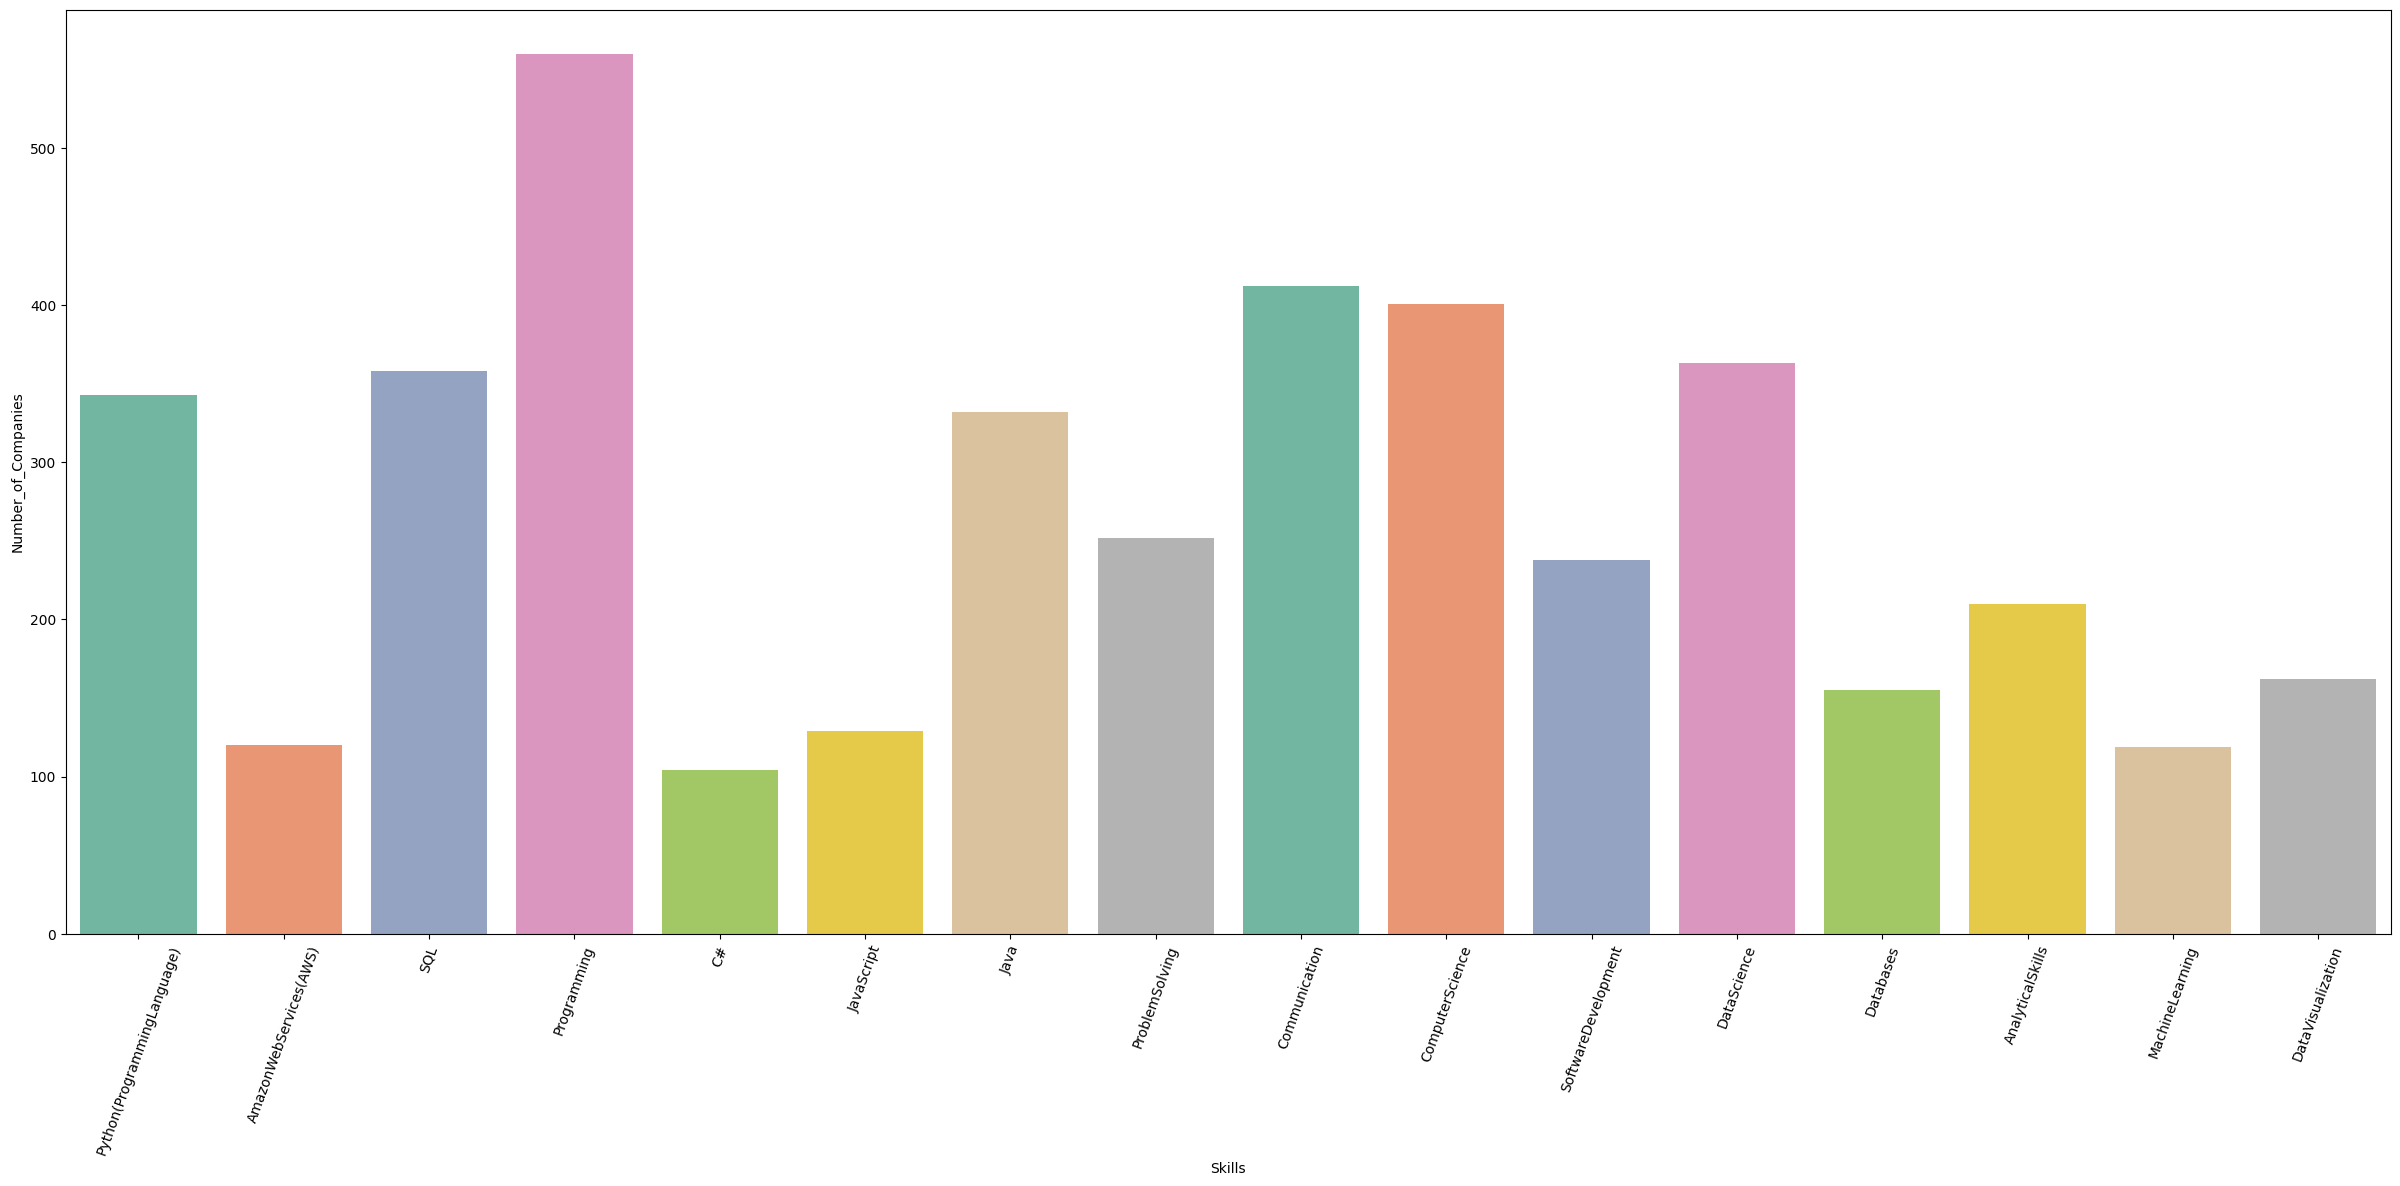

In [131]:

skills_df = df.loc[:,'Python(ProgrammingLanguage)':]
skills_df = skills_df.drop('P',axis=1)
counts = []
skills = []
for skill in skills_df.columns:
    if skills_df[skill].sum() >= 100 and skill != "":
        counts.append(skills_df[skill].sum())
        skills.append(skill)
new_skills_df = pd.DataFrame({
    'Skills' : skills,
    'Number_of_Companies':counts,
}
)

plt.figure(figsize=(30, 12))
skills_graph = sns.barplot(data=new_skills_df,x='Skills',y='Number_of_Companies',palette='Set2')
skills_graph.set_xticklabels(skills_graph.get_xticklabels(),rotation=70)
plt.show()

Analysis for Skills requirements

-Programming Skills are Essential: Programming (568 mentions) and specific languages like Python and Java are highly sought after.

-Data Science and Analytics: Skills related to data, such as Data Science, Data Analytics, and Data Analysis, are crucial in many positions.

-Analytical and Problem-Solving Skills: Analytical Skills and Problem Solving are highlighted, indicating the importance of critical thinking.

-Communication Skills: Communication is emphasized, suggesting that effective communication is valued in these roles.

-Computer Science and Software Development: These skills are mentioned in a significant number of job postings, highlighting the demand for technical expertise.

Illustrating the distribution of job postings based on the time of scraping job information.

C:\Users\tranm\AppData\Local\Temp\ipykernel_28648\2762613179.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line.set_xticklabels(line.get_xticklabels(),rotation=70)


[Text(0, 0, '2023-09-03'),
 Text(1, 0, '2023-09-11'),
 Text(2, 0, '2023-09-12'),
 Text(3, 0, '2023-09-17'),
 Text(4, 0, '2023-09-20'),
 Text(5, 0, '2023-09-25'),
 Text(6, 0, '2023-09-26'),
 Text(7, 0, '2023-09-28'),
 Text(8, 0, '2023-09-29'),
 Text(9, 0, '2023-09-30'),
 Text(10, 0, '2023-10-01'),
 Text(11, 0, '2023-10-02'),
 Text(12, 0, '2023-10-04'),
 Text(13, 0, '2023-10-05'),
 Text(14, 0, '2023-10-06'),
 Text(15, 0, '2023-10-07'),
 Text(16, 0, '2023-10-08'),
 Text(17, 0, '2023-10-09'),
 Text(18, 0, '2023-10-10'),
 Text(19, 0, '2023-10-12'),
 Text(20, 0, '2023-10-13'),
 Text(21, 0, '2023-10-14'),
 Text(22, 0, '2023-10-15'),
 Text(23, 0, '2023-10-16'),
 Text(24, 0, '2023-10-17'),
 Text(25, 0, '2023-10-18'),
 Text(26, 0, '2023-10-19')]

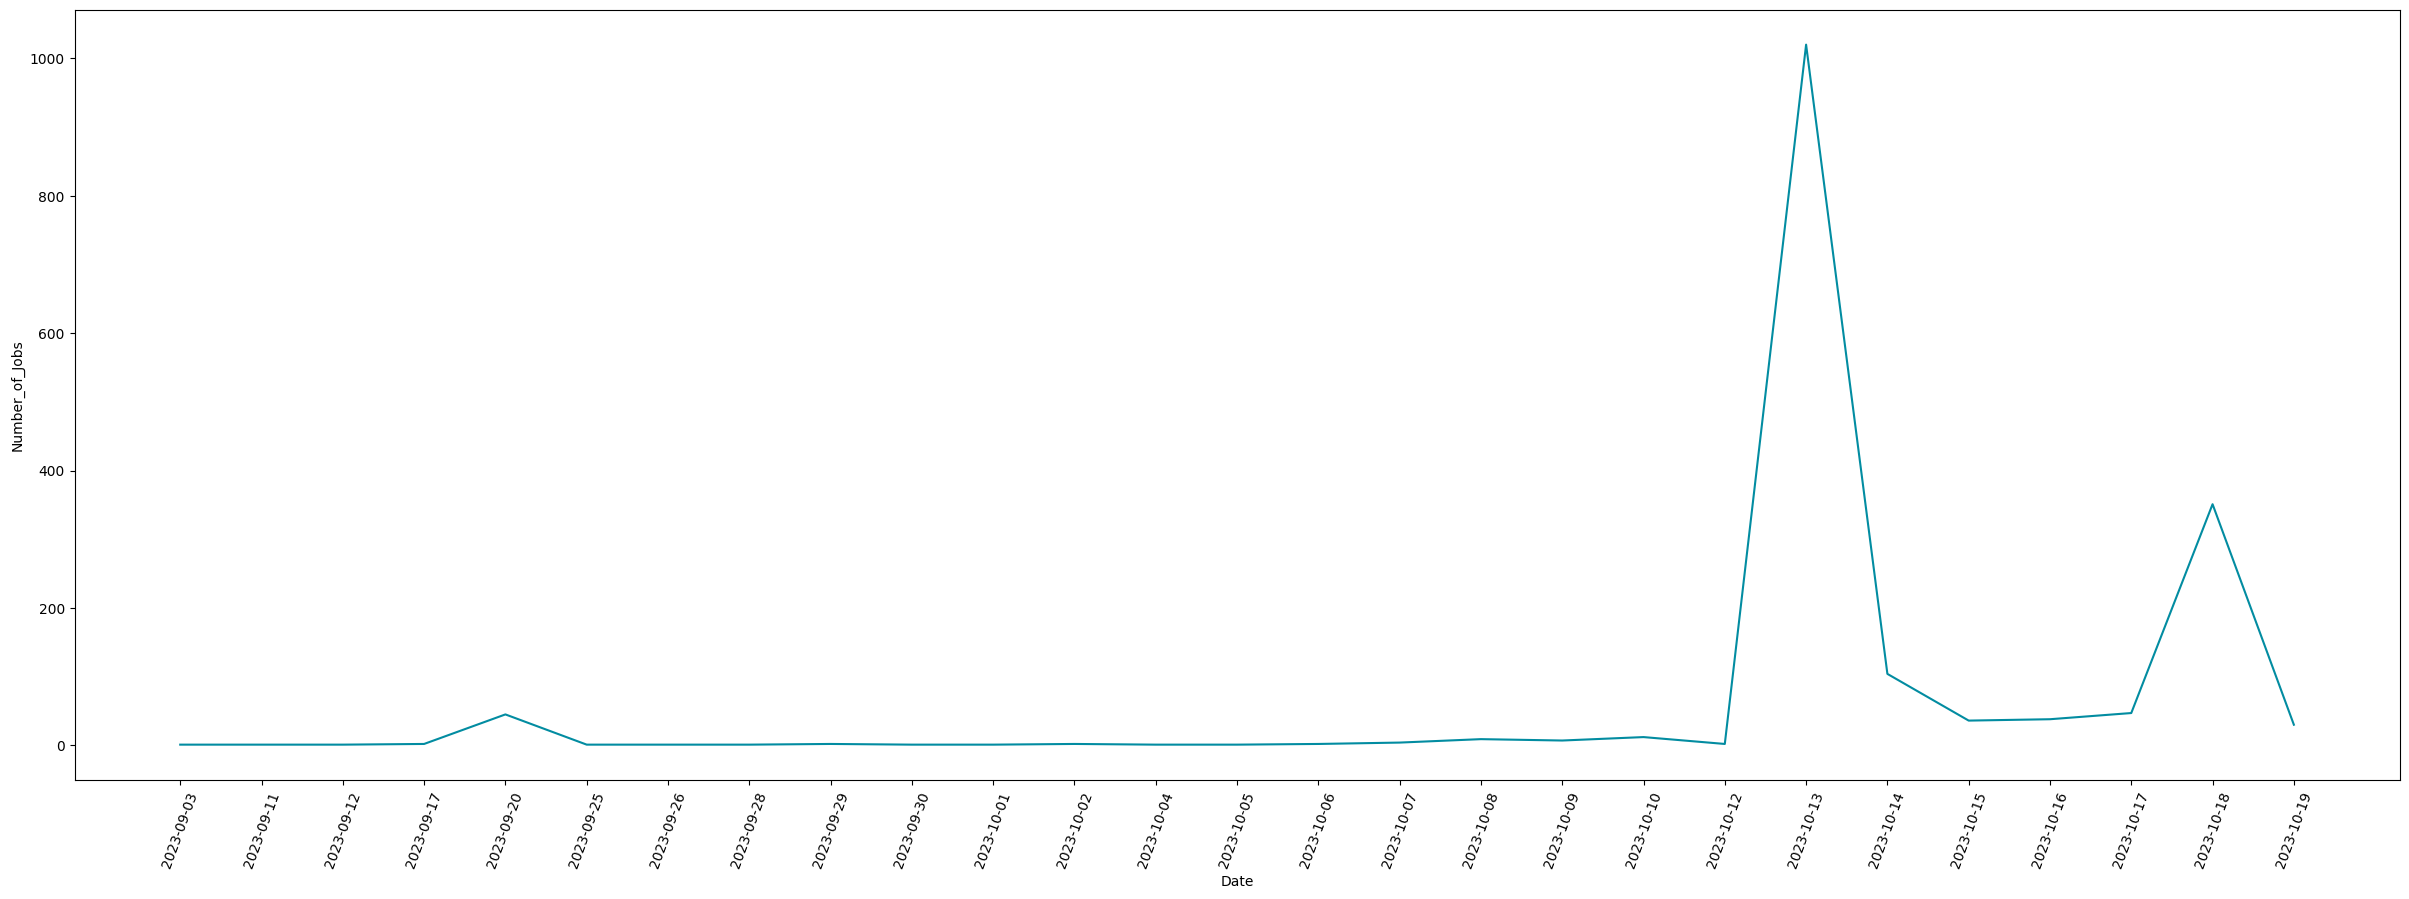

In [132]:
date_and_job = df.groupby('Date').size().to_frame('Number_of_Jobs').reset_index()
plt.figure(figsize = (30,10))
line = sns.lineplot(date_and_job,x = 'Date',y = 'Number_of_Jobs',markers=True,color='#028ca1')
line.set_xticklabels(line.get_xticklabels(),rotation=70)

Analysis for Job postings

-Fluctuations in Job Postings: The data shows fluctuations in the number of job postings over the given period. Some days see only a few job postings, while others show higher activity.

-Increasing Trend Over Time: There appears to be a general increasing trend in the number of job postings as time progresses. This suggests a potential growth in job opportunities during the observed period.

-Periods of Stability: Despite fluctuations, there are periods where the number of job postings remains relatively stable for some time. Identifying these stable periods could be useful for understanding consistent hiring trends.

### 3. Data Process and Develop Machine Learing model

In this Linkedin project, I will use Linear Regression for salary prediction due to its simplicity, interpretability, and assumption of a linear relationship between predictors (job title, skills, industry) and salary. It provides insights into feature importance and is well-suited for numeric target variables. However, it's essential to validate assumptions before application, and for more complex relationships, advanced models may be considered.

Set categorical variable to dummy variable

In [133]:
fixed_df = df[(df['Location'].isin(get_location))].loc[:,'Job_Title':"Location"].drop(columns=['Company_Name',"Employee","Working_Status"],axis=1)
tmp_df = df[(df['Location'].isin(get_location))].loc[:,'Job_Title':].drop(columns=['Company_Name',"Employee","Date"],axis=1)
fixed_df = pd.concat([fixed_df,tmp_df[skills]],axis=1)

In [134]:
fixed_df = pd.get_dummies(fixed_df)

In [135]:
fixed_df = fixed_df.replace({True:1,False:0})

In [136]:
fixed_df = fixed_df.reset_index()
fixed_df = fixed_df.drop(columns='index',axis=1)


Reset the name of the column after making dummy variables

In [137]:
for ele in fixed_df.columns[1:]:
    title = ''
    i = len(ele) - 1
    try:
        while ele[i] != '_':
            title = ele[i] + title
            i -= 1
        fixed_df = fixed_df.rename(columns={ele:title})
    except:
        pass

In [138]:
y = fixed_df['Salary']
x = fixed_df.iloc[:,1:]
x = x.replace(np.nan,0)
fixed_df.to_csv("Streamlit_Prediction.csv",index=False)

Merge the original data with skill data after filtering

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=41)

In [140]:
linear_model = LinearRegression()
model = linear_model.fit(x_train,y_train)

Get the prediction

In [141]:
y_pred = linear_model.predict(x_test)

Summary table after training

In [142]:
Sum_table = sm.OLS(y_pred,x_test).fit()
Sum_table